# Task 2 - Decomposition-based anomaly detection


### Library imports

In [1]:
# Math
import math
from random import gauss, random
import statsmodels.api as sm

# Data management
import numpy as np
from pandas import Series, read_csv

# Neural networks
import torch
import torch.nn as nn
from torch.autograd import Variable
import keras

# ARIMA
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Plotting
from matplotlib.pyplot import plot, show, xlim, ylim, legend, subplots, title, yscale, ylabel, xlabel, boxplot, figure
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# Metrics
from sklearn.metrics import mean_squared_error as mse, mean_absolute_percentage_error as mape, mean_absolute_error as mae
from statsmodels.tsa.stattools import adfuller
from scipy.stats import zscore


# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

## Task 1 - Anomaly identification in global land temperature changes

### Helper functions

In [2]:
# Finds anomaly in data set
# If (zscore > 3) is detected, index and value is output as anomaly is detected
def detect_anomaly(data_set):
    scores = zscore(data_set)

    for index, val in enumerate(scores):
        if(val > 3 or val < -3):
            print(f"Anomaly detected at datetime {scores.index[index]} with score {val}")

### Data management

<Axes: xlabel='dt'>

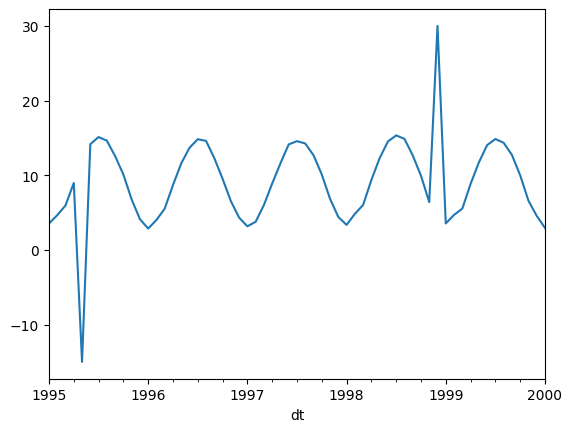

In [3]:
# Loads data from csv file
file_name = "Data Sets\GlobalTemperatures.csv"
series = read_csv(file_name, header = 0, delimiter = ",", parse_dates = ["dt"])
series = Series(series['LandAverageTemperature'].values, index = series['dt'])
# Solve missing values
series = series.fillna(method='ffill')

# Insertion of anomaly points
series.loc["1998-12-1"] = 30
series.loc["1995-05-1"] = -15

# Trim series to fit relevant data
series_reduced = series["1995-01-01" : "2000-01-01"]

# Visualization of trimmed data
series_reduced.plot()

### Decomposition

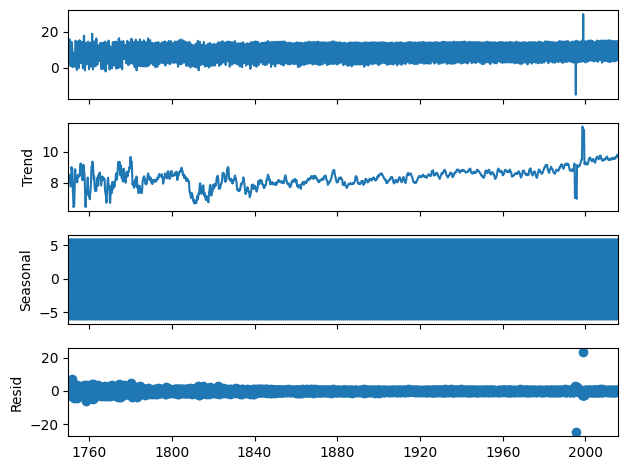

In [8]:
# Decompose and visualize data
seasonal_decompose(series).plot();

# From the decomposition graphs below, one can clearly distinguish the anomaly in both the trend and the residuals

### Identifying anomaly

In [5]:
# Using z-score to detect anomaly
detect_anomaly(series)

Anomaly detected at datetime 1995-05-01 00:00:00 with score -5.298245227421691
Anomaly detected at datetime 1998-12-01 00:00:00 with score 4.901727056739013


### Visualizing anomalies using boxplot

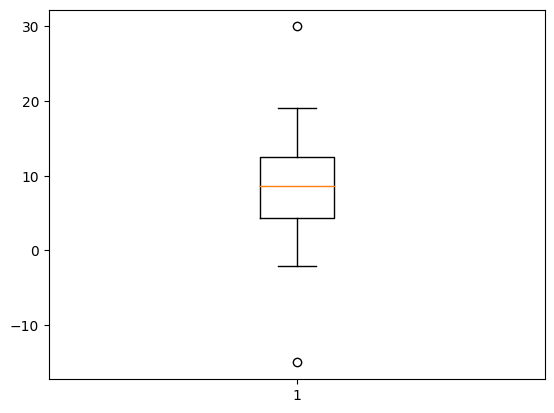

In [11]:
boxplot(series);

# Discussion

1. Can the decomposition clearly separate the trend, season (constant period), and remainder components?
Yes, the seasonal decomposition seems to achieve this. It requires trimming the dataset, or increasing the figure size of the plot, but is ultimately achievable.

2. When decomposing the series, is there a general rule to determine which part belongs to a trend, a season, or a remainder? Or is it embedded in and thus dependent on each individual algorithm?
Though it may seem that there is a general rule, to determine the various parts of the decomposition depends on the algorithm. This, in turn, depends on the data set. Through experience and experimentation, the user may find a fitting algorithm which allows for an optimized decomposition. It isn't always possible to find trends and seasonality either, e.g. if the data set is random.

3. Is there a growing tendency in the trend series?
In the entire series, yes. A small incline can be found in the series.